In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [2]:
#Check if response is running correctly before running loop
#response = requests.get(full_url).json()
#print(response["coord"]["lat"])

In [ ]:
#My attempt of Creating a loop through all the cities and creating a data frame 
#from neccessary data
#Perform API Calls
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
api_part = "&appid=" + weather_api_key

#create lists to hold column values for new dataframe
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Perform a weather check on each city using a series of successive API calls.
for city in (cities):
    try:
        full_url = base_url + city + api_part
        response = requests.get(full_url).json()
    
        #Add city info to appropiate lists
    
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except:
        print("City not found. Skipping city...")
        pass

#Include a print log of each city as it'sbeing processed (with the city number and city name).
#print(response["name"])

main_df = pd.DataFrame({
    "name": cities,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "country": country,
    "date": date,
})
#main_df

In [5]:
#Code From Solution
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | getulio vargas
Processing Record 3 of Set 1 | verkhnechusovskiye gorodki
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | velykyy burluk
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | kapiri mposhi
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 21 of Set 1 | sao j

Processing Record 36 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | mitu
Processing Record 39 of Set 4 | marcona
City not found. Skipping...
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 42 of Set 4 | chumikan
Processing Record 43 of Set 4 | muros
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | ambon
Processing Record 48 of Set 4 | jiexiu
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 0 of Set 5 | portland
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | whitianga
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | picui
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | airai
P

Processing Record 23 of Set 8 | bonfim
Processing Record 24 of Set 8 | rawson
Processing Record 25 of Set 8 | chorozinho
Processing Record 26 of Set 8 | arica
Processing Record 27 of Set 8 | kayankulam
Processing Record 28 of Set 8 | payakumbuh
Processing Record 29 of Set 8 | hermiston
Processing Record 30 of Set 8 | bambous virieux
Processing Record 31 of Set 8 | arya
Processing Record 32 of Set 8 | cururupu
Processing Record 33 of Set 8 | peterhead
Processing Record 34 of Set 8 | gamba
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | wattegama
Processing Record 37 of Set 8 | zwedru
Processing Record 38 of Set 8 | borjomi
Processing Record 39 of Set 8 | mao
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | hami
Processing Record 42 of Set 8 | altea
Processing Record 43 of Set 8 | port hawkesbury
Processing Record 44 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 45 of Set 8 | boyolangu
Processing Record 46 of Set 8 | qeshm
P

Processing Record 14 of Set 12 | oswego
Processing Record 15 of Set 12 | newport
Processing Record 16 of Set 12 | fukue
Processing Record 17 of Set 12 | satitoa
City not found. Skipping...
Processing Record 18 of Set 12 | boffa
Processing Record 19 of Set 12 | ampanihy
Processing Record 20 of Set 12 | mazamari
Processing Record 21 of Set 12 | mentok
City not found. Skipping...
Processing Record 22 of Set 12 | clearwater
Processing Record 23 of Set 12 | muhoroni
Processing Record 24 of Set 12 | makakilo city
Processing Record 25 of Set 12 | lichtervelde
Processing Record 26 of Set 12 | lasa
Processing Record 27 of Set 12 | freeport
Processing Record 28 of Set 12 | virginia beach
Processing Record 29 of Set 12 | bonavista
Processing Record 30 of Set 12 | grindavik
Processing Record 31 of Set 12 | malazgirt
Processing Record 32 of Set 12 | lima
Processing Record 33 of Set 12 | coihaique
Processing Record 34 of Set 12 | darhan
Processing Record 35 of Set 12 | imbituba
Processing Record 36 

In [97]:
#Create dataframe from city_data
city_df = pd.DataFrame(data = city_data)
city_df.head()

#create a csv file of this newly formed data frame
city_df.to_csv("city_weather.csv")

In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,19.555804,14.929606,62.159254,69.496269,64.718284,7.879086,1.651508e+09
std,33.699479,93.032162,20.718614,21.387043,37.249863,5.157052,1.227063e+02
min,-54.800000,-179.166700,0.680000,1.000000,0.000000,0.000000,1.651507e+09
25%,-7.871025,-69.157850,50.610000,57.750000,31.750000,4.000000,1.651507e+09
50%,23.658150,16.908600,65.190000,74.000000,76.500000,6.910000,1.651508e+09
75%,47.592125,102.719200,78.300000,86.000000,100.000000,10.360000,1.651508e+09
max,78.218600,178.416700,107.640000,100.000000,100.000000,34.290000,1.651508e+09


In [40]:
# Inspect the data and remove the cities where the humidity > 100%.
cleaned_city_df = city_df.loc[(city_df["Humidity"] < 100), :]

#There was 536 rows now there is 532 meaning 4 rows had humidity above 100

This plot is determining the correlation between the latitude of a city and the cities max temperature.


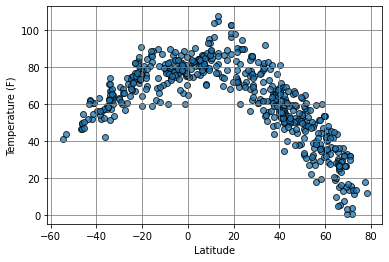

In [93]:
#Plotting the Data
#Latitude vs Temperature Plot
plt.scatter(cleaned_city_df["Lat"], cleaned_city_df["Max Temp"], alpha = .75, 
            edgecolors = "black", label = "Cities", linewidths = 1)
#Add supplemental information
#plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(color = "grey")

plt.savefig("lat_vs_temp.png")
plt.show
print("This plot is determining the correlation between the latitude of a city and the cities max temperature.")

This plot is determining the correlation between the latitude of a city and the cities humidity.


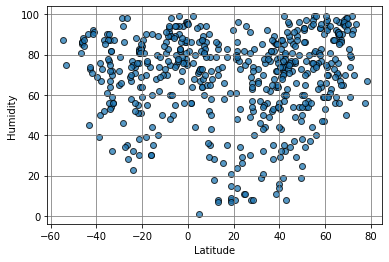

In [94]:
# Latitude vs. Humidity Plot
plt.scatter(cleaned_city_df["Lat"], cleaned_city_df["Humidity"], alpha = .75,
           edgecolors = "black", label = "Cities", linewidths = 1)
#plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color = "grey")

plt.savefig("lat_vs_humidity.png")
plt.show
print("This plot is determining the correlation between the latitude of a city and the cities humidity.")

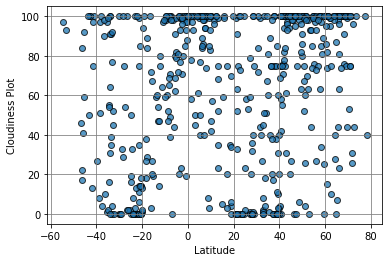

This plot is determining the correlation between the latitude of a city and the cities cloudiness.


In [95]:
# Latitude vs. Cloudiness Plot
plt.scatter(cleaned_city_df["Lat"], cleaned_city_df["Cloudiness"], alpha = .75,
           edgecolors = "black", label = "Cities", linewidths = 1)
#plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Plot")
plt.grid(color="grey")

plt.savefig("lat_vs_cloudines.png")

plt.show()
print("This plot is determining the correlation between the latitude of a city and the cities cloudiness.")

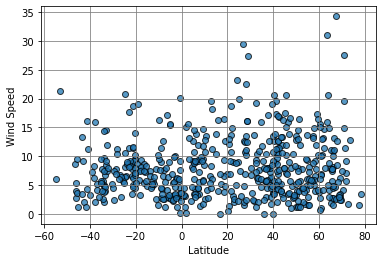

This plot is determining the correlation between the latitude of a city and the cities wind speed.


In [96]:
#Latitude vs. Wind Speed Plot
plt.scatter(cleaned_city_df["Lat"], cleaned_city_df["Wind Speed"], alpha = .75,
           edgecolors = "black", label = "Cities", linewidths = 1)
#plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color="grey")
plt.savefig("lat_vs_windspeed.png")
plt.show()
print("This plot is determining the correlation between the latitude of a city and the cities wind speed.")

In [59]:
# Linear Regression

In [ ]:
#Create two dataframes for north and south hemisphere
northern_df = cleaned_city_df.loc[(cleaned_city_df["Lat"] >= 0)]
southern_df = cleaned_city_df.loc[(cleaned_city_df["Lat"] < 0)]

The r-value is: 0.7853987626639907


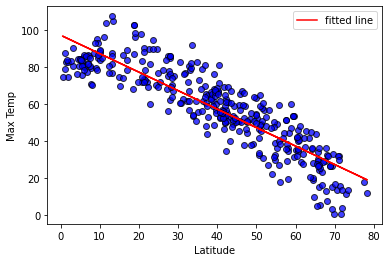

In [78]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
res = linregress(northern_df["Lat"], northern_df["Max Temp"])

#now plot scatter plot plus linear regression
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(northern_df["Lat"], res.intercept + res.slope*northern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print(f"The r-value is: {res.rvalue**2}")
plt.show()

The r-value is: 0.5641747074714629


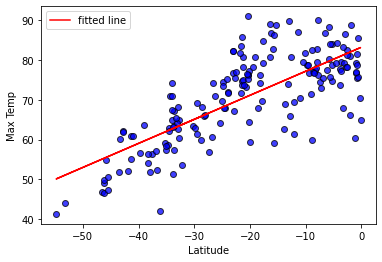

Since the r-value is above .05 there is a moderate correlation between latitude and max temperature in the southern hemisphere.


In [88]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
res2 = linregress(southern_df["Lat"], southern_df["Max Temp"])

#now plot scatter plot plus linear regression
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(southern_df["Lat"], res2.intercept + res2.slope*southern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print(f"The r-value is: {res2.rvalue**2}")
plt.show()
print("Since the r-value is above .05 there is a moderate correlation between latitude and max temperature in the southern hemisphere.")

The r-value is: 0.06665148164485916


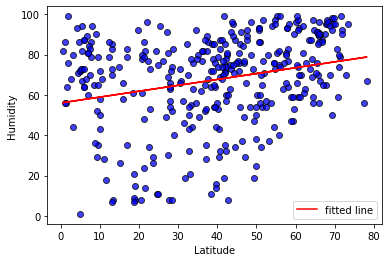

Since there is a low r-value there is a small to no correlation between a cities latitiude and humidity.


In [89]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
res3 = linregress(northern_df["Lat"], northern_df["Humidity"])

#now plot scatter plot plus linear regression
plt.scatter(northern_df["Lat"], northern_df["Humidity"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(northern_df["Lat"], res3.intercept + res3.slope*northern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
print(f"The r-value is: {res3.rvalue**2}")
plt.show()
print("Since there is a low r-value there is a small to no correlation between a cities latitiude and humidity.")

The r-value is: 0.01979724875462545


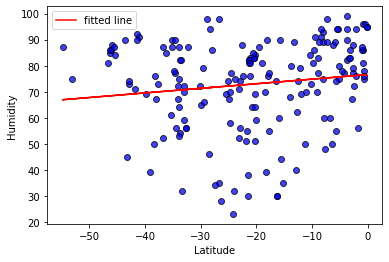

In [82]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
res4 = linregress(southern_df["Lat"], southern_df["Humidity"])

#now plot scatter plot plus linear regression
plt.scatter(southern_df["Lat"], southern_df["Humidity"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(southern_df["Lat"], res4.intercept + res4.slope*southern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
print(f"The r-value is: {res4.rvalue**2}")
plt.show()

The r-value is: 0.023246301427080614


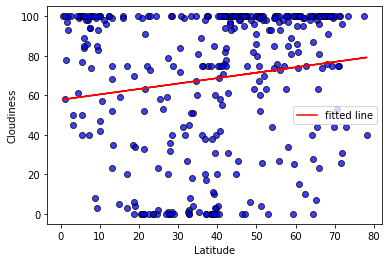

In [83]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
res5 = linregress(northern_df["Lat"], northern_df["Cloudiness"])

#now plot scatter plot plus linear regression
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(northern_df["Lat"], res5.intercept + res5.slope*northern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
print(f"The r-value is: {res5.rvalue**2}")
plt.show()

The r-value is: 0.05637981594646277


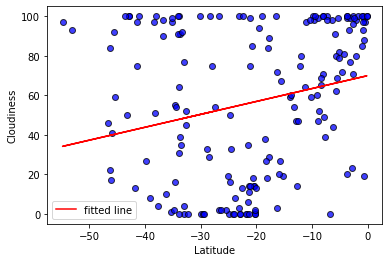

Since there is a low r-value there is a small to no correlation between a cities latitiude and couldiness in either the north or south hemisphere.


In [90]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
res6 = linregress(southern_df["Lat"], southern_df["Cloudiness"])

#now plot scatter plot plus linear regression
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(southern_df["Lat"], res6.intercept + res6.slope*southern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
print(f"The r-value is: {res6.rvalue**2}")
plt.show()
print("Since there is a low r-value there is a small to no correlation between a cities latitiude and couldiness in either the north or south hemisphere.")

The r-value is: 1.5962001178069348e-05


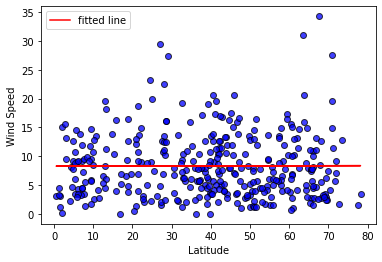

In the northern hemisphere there is a strong correlation between the latitude of a city and its wind speed because the r-value is above 1.


In [91]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
res7 = linregress(northern_df["Lat"], northern_df["Wind Speed"])

#now plot scatter plot plus linear regression
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(northern_df["Lat"], res7.intercept + res7.slope*northern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend()
print(f"The r-value is: {res7.rvalue**2}")
plt.show()
print("In the northern hemisphere there is a strong correlation between the latitude of a city and its wind speed because the r-value is above 1.")

The r-value is: 0.01084828356519636


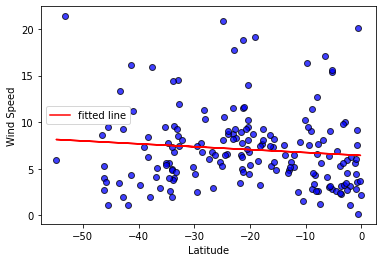

In the southern hemisphere there is a small to no correlation between the latitude of a city and its wind speed because the r-value is close to zero.


In [92]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
res8 = linregress(southern_df["Lat"], southern_df["Wind Speed"])

#now plot scatter plot plus linear regression
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], c = "blue", alpha = .75,
           edgecolors = "black", linewidths = 1)

#add linear regression line to scatterplot
plt.plot(southern_df["Lat"], res8.intercept + res8.slope*southern_df["Lat"], 'r', label='fitted line')

#plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend()
print(f"The r-value is: {res8.rvalue**2}")
plt.show()
print("In the southern hemisphere there is a small to no correlation between the latitude of a city and its wind speed because the r-value is close to zero.")